# Data analytics with `pandas` and `matplotlib`

In this task, you are asked to analyze cryptocurrency data using the pandas and matplotlib libraries.
The task looks like a laboratory work in which you have to fill in the missing cells and answer a series of questions.
 - [Official pandas documentation](https://pandas.pydata.org/)
 - [Official matplotlib documentation](https://matplotlib.org/index.html)

> **Reminder**
>
>Minimum points for crediting this work - **1 point**. If you do not score here 1 point, then you get a failure throughout the course (see slides from the introductory presentation).

## 1. Data (2 points)

Downloading data for work:

In [53]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 190MB/s]


Let's start with the necessary preparations.

In [54]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Load a pre-prepared dataset from *"coins.csv"* file. Create an object of type `pandas.DataFrame` named `coins` and select the date column as the index.

In [55]:
# load dataset and creating the dataframe
coins = pd.read_csv('coins.csv')

# Select the date column as the index.
coins['datetime'] = pd.to_datetime(coins['date'])
coins.set_index('datetime', inplace=True)

Let's see what happened

In [56]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Let's explain the values ​​stored in the columns
 - date - measurement date
 - name - full name of the coin
 - symbol - abbreviated name of the coin
 - price - average coin price per trading day in USD
 - txCount - the number of transactions in the network of this coin
 - txVolume - the volume of coins transferred between addresses in the network of this coin
 - activeAddresses - the number of addresses that made transactions on this day in the network of this coin
 - open - the price of the coin at the beginning of trading on the given day
 - close - the price of the coin at the end of the trading day
 - high - the highest price of this coin during the current trading day
 - low - the lowest price of the given coin during the given trading day
 - volume - trading volume of this coin on exchanges on a given day
 - market - capitalization of this coin on a given day

Let's examine the data. Answer the following questions (insert cells with code and text below):

### 1. How many different coins are there in the dataset? (0.4 points)

In [57]:
# We can count coins based on their symbols
coins_count = coins['symbol'].nunique()

print("The answer is: " + str(coins_count))

The answer is: 66


**66** is the number of different coins in the dataset

### 2. For what period do we have data? (0.4 points)

In [58]:
# We can use the date column in the dataset to find the period
# By choosing the minimum date and maximum date in the column
min_date = coins.index.min()
max_date = coins.index.max()

print("The period starts from ", min_date.date(), " to ", max_date.date())

The period starts from  2013-04-28  to  2018-06-06


The period covered starts on **2013-04-28** and ends on **2018-06-06**.

### 3. Are there gaps in the data? What is the nature of these omissions, what are they most likely caused by? (0.5 points)

In [59]:
# Date range
d_range = pd.date_range(start=min_date, end=max_date)

# Missing days
print("Number of missing days are:", len(d_range.difference(coins.index)), "\n")

# Empty cells count by column
print(coins.isna().sum())

Number of missing days are: 0 

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64


There are **no missing days** in the dataset from the beginning till the end.<br>

However there are **327 empty cells in the price column**, this could be due to the lack of information regarding the concerned currency.
<br>

There are empty cells as well in other columns such are **txCount**, **activeAddresses**, **txVolume**, **txCount**.

### 4. Which coin had the highest price and when? (0.2 points)

In [60]:
# We can get the row with highest price
highest_price = coins[coins['price'] == coins['price'].max()]

print("The name of the highest price coin is", highest_price["name"].values[0], "and the date is", highest_price["date"].values[0])

The name of the highest price coin is Bitcoin and the date is 2017-12-17


The highest price coin is the **Bitcoin** and the date was **2017-12-17**.

### 5. Which coin has the highest and lowest total capitalization? Build a pie chart with proportions. (0.5 points)

In [69]:
# Get dataframe of total capitalization
# We could group with symbols as well but that wouldn't give us names
total_cap = coins.groupby('name')['market'].max()

print("The coin with the highest capitalization is", total_cap.idxmax(), "with capitalization value of ", total_cap.max())
print("The coin with the highest capitalization is", total_cap.idxmin(), "with capitalization value of ", total_cap.min())

The coin with the highest capitalization is Bitcoin with capitalization value of  326141000000.0
The coin with the highest capitalization is KingN Coin with capitalization value of  219933.0


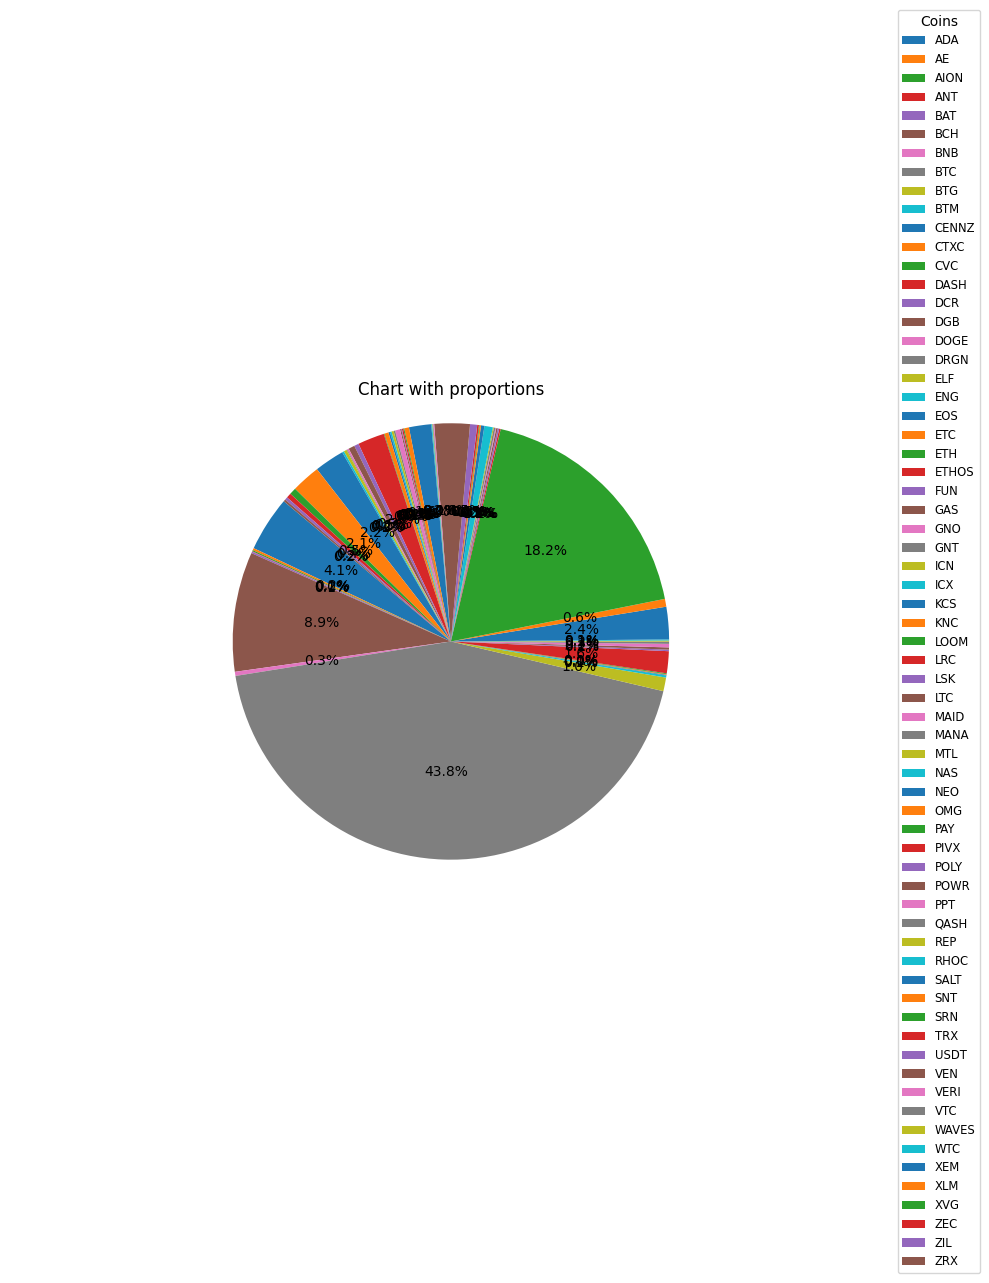

In [80]:
# The pie chart with proportions

def pie_chart(coins):
    coin_caps = coins.groupby('symbol')['market'].max()
    sizes = coin_caps.values

    explode = [0.1 if coin == total_cap.idxmax() else 0 for coin in coin_caps.index]

    plt.figure(figsize=(10, 10))
    patches, _, _ = plt.pie(sizes, explode=explode, autopct='%1.1f%%', startangle=140)

    plt.legend(patches, coin_caps.index, loc="center left", bbox_to_anchor=(1, 0.5), title="Coins", fontsize='small')

    plt.title('Chart with proportions')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

pie_chart(coins)

## 2. Visualization (1 point)

The most interesting part of the analyst's job is to carefully look at correctly chosen and constructed charts.

**Implement a function to visualize the prices of the selected currency for the selected date range.**

The chart should show the start and end prices of sales. As well as the minimum and maximum price for that day.
Label the graph and coordinate axes. Add a grid. Increase the image size.
You can try using `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), but you can do without it.

In [88]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coin = coins[coins['symbol'] == symbol]
    d_range = coin.loc[start_date:end_date]

    plt.figure(figsize=(12, 8))

    plt.plot(d_range.index, d_range['open'], label='Start Price', marker='o')
    plt.plot(d_range.index, d_range['close'], label='End Price', marker='o')
    plt.scatter(d_range.index, d_range['high'], label='Max Price', marker='^', color='red')
    plt.scatter(d_range.index, d_range['low'], label='Min Price', marker='v', color='green')
    coin_name = coin['name'][0]
    plt.title(f'Price action for {coin_name} (from {start_date} to {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

Let's see what happened:

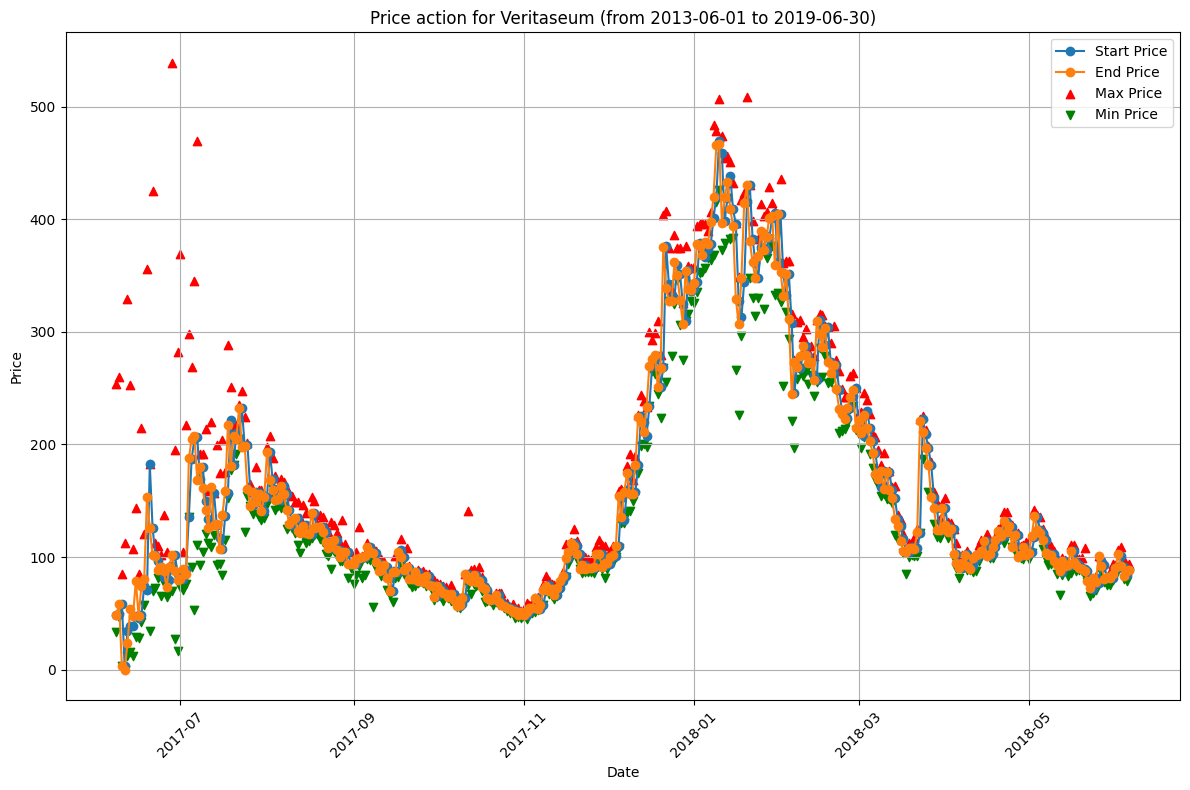

In [89]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

There is no data science in this task. It's just that an analyst should be able to build charts, or know ready-made tools.

## 3. Pump and dump (1 point)

Cryptocurrency exchanges still remain a marginal place, a kind of wild west of the financial world. As a consequence, schemes thrive here regarding
honest withdrawal of money. One of them is **pump'n'dump** (pump and dump).

She looks like this. Several large players or many small ones agree to buy together an obscure coin with a low price and trading volume. This leads to an instant rise in price (pump), then inexperienced players come in the hope of making money on such growth. At this point, the organizers of the scheme will start selling everything (dump). The whole process takes from several minutes to several hours.

Your task is to **find the strongest pump'n'dump** of the coin in the given time period. To do this, for each day, we define the number `pnd` equal to the ratio of the maximum price of the coin on the given day to the maximum of the opening and closing prices on the same day. We need to find the day when `pnd` was maximum and the value of `pnd`.

In [117]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coin = coins[coins['symbol'] == symbol]
    d_range = coin.loc[start_date:end_date]

    # Getting the ratio
    d_range['pnd'] = d_range['high'] / d_range[['open', 'close']].max(axis=1)

    pnd_day = d_range['pnd'].idxmax()
    pnd_value = d_range.loc[pnd_day, 'pnd']
    coin_name = coin['name'][0]

    print("The strongest pump'n'dump for", coin_name, "occurred on", pnd_day.date(),"with a PnD ratio of", f"{pnd_value:.2f}")
    pd.options.mode.chained_assignment = None

In [118]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

The strongest pump'n'dump for Bitcoin occurred on 2017-11-29 with a PnD ratio of 1.14


Compare these values ​​for different coins:

In [124]:
unique_symbols = coins['symbol'].unique()

for symbol in unique_symbols:
  try:
    find_most_severe_pump_and_dump(coins, symbol=symbol, start_date='2017-06-01', end_date='2018-06-01')
  except:
    pass

The strongest pump'n'dump for Bitcoin occurred on 2017-11-29 with a PnD ratio of 1.14
The strongest pump'n'dump for Litecoin occurred on 2018-02-07 with a PnD ratio of 1.11
The strongest pump'n'dump for Dogecoin occurred on 2017-12-17 with a PnD ratio of 1.27
The strongest pump'n'dump for Vertcoin occurred on 2017-10-22 with a PnD ratio of 1.40
The strongest pump'n'dump for DigiByte occurred on 2017-12-17 with a PnD ratio of 1.36
The strongest pump'n'dump for Dash occurred on 2017-11-29 with a PnD ratio of 1.20
The strongest pump'n'dump for MaidSafeCoin occurred on 2017-06-07 with a PnD ratio of 1.29
The strongest pump'n'dump for Stellar occurred on 2017-10-16 with a PnD ratio of 1.33
The strongest pump'n'dump for Verge occurred on 2017-12-17 with a PnD ratio of 1.73
The strongest pump'n'dump for Tether occurred on 2017-11-12 with a PnD ratio of 1.10
The strongest pump'n'dump for NEM occurred on 2018-01-04 with a PnD ratio of 1.14
The strongest pump'n'dump for Ethereum occurred on 2017

## 4. ROI (1 point)

You need to calculate **return on investment (ROI)** in cryptocurrencies over a given period of time.

Payback is defined as the ratio of *portfolio price change* to *portfolio initial price*. The portfolio price is the total value (in USD) of all coins in the portfolio.

`investments` is a dictionary where the keys are the names of the coins, the values ​​are the amount of investments in this coin (in USD).

In [125]:
pd.options.mode.chained_assignment = "warn"

def compute_roi(coins, investments, start_date, end_date):
    d_range = coins.loc[start_date:end_date]

    value, final_value = sum(investments[coin] for coin in investments), 0

    for coin, investment_amount in investments.items():
        coin_data = d_range[d_range['symbol'] == coin]
        final_value += coin_data.iloc[-1]['close'] * investment_amount

    roi = (final_value - value) / value

    return roi

In [128]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

5066.606666666667

In [127]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

5142.046666666667

## 5. Technical analysis (1 point)

**Technical analysis** is a way to predict the behavior of a chart based on some auxiliary values ​​built on the original chart. One of the simplest methods of technical analysis is **[Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Someone believes that the graph touching the border should be reflected from it.

Borders are considered very simply:

$$(MA \pm K\sigma),$$

where `MA` is the `N` day moving average and $\sigma$ is the `N` day moving standard deviation.

Draw **price chart**, **moving average** and **Bollinger bands** with parameters `N (window) = 21`, `K (width) = 2`.

The `rolling` function will help you here to calculate the mean and standard deviation over a sliding window.

Don't forget to label the graph and axes, draw the legend and choose the best location for it.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Conclude whether the Bollinger Rule was followed:**

**Your answer is here**

## 6. Capitalization as an indicator (1 point)

Many people who trade cryptocurrencies like to look at [capitalization](https://academy.binance.com/en/articles/crypto-market-capitalization-explained). Let's understand why.

**Draw two more graphs:**
1. total capitalization of bitcoin (BTC), ether (ETH), eos (EOS), bitcoin cash (BCH), stellar (XLM) and litecoin (LTC)
2. shares of capitalizations of these coins from the total market capitalization.

In this case, use the data starting from 2017-07-01.

In [131]:
def plot_coins_capitalizations(coins, symbols, start_date):
    s_coins = coins[(coins['symbol'].isin(symbols)) & (coins.index >= start_date)]
    coin_caps = {}

    for symbol in symbols:
        coin_data = s_coins[s_coins['symbol'] == symbol]
        coin_caps[symbol] = coin_data['market'].sum()

    # total market capitalization
    market_cap = sum(coin_caps.values())

    # Plotting total capitalizations
    plt.figure(figsize=(12, 6))
    plt.bar(coin_caps.keys(), coin_caps.values(), color='skyblue')
    plt.title('Total Capitalizations of Selected Coins')
    plt.xlabel('Cryptocurrency')
    plt.ylabel('Total Capitalization (in USD)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # shares of capitalizations
    shares = {symbol: cap / market_cap for symbol, cap in coin_caps.items()}
    plt.figure(figsize=(8, 8))
    plt.pie(shares.values(), labels=shares.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Shares of Capitalizations from Total Market Capitalization')
    plt.show()

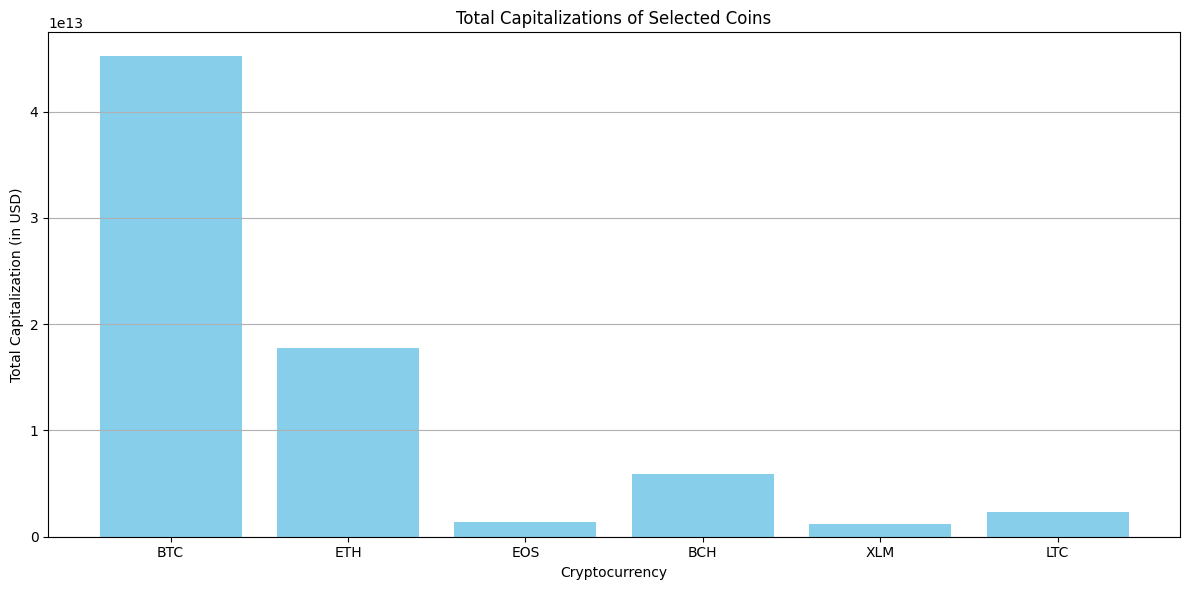

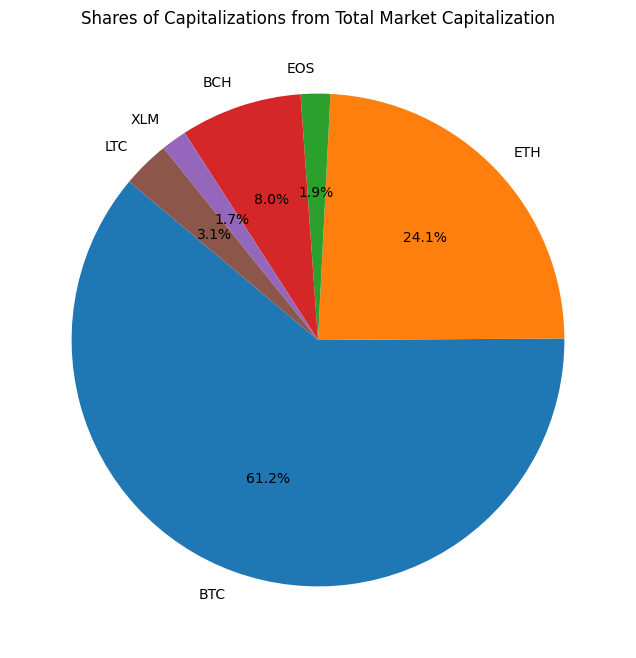

In [132]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Analyze the dependence of the share of capitalization of altcoins (other coins, except for bitcoin) on the share of capitalization of bitcoin. What do you think is the reason for this dependence?

**Your answer is here**

## 7. Coin correlations (1 point)

Now we need to take a closer look at the correlations of the average shares of coin capitalizations. In this case, we will look at the average smoothed over the last `window` days until the day `date` with a smoothing coefficient `alpha` for the set of coins `symbols`.

Implement a function that will return a square `DataFrame` with the number of rows and columns equal to the number of coins in question and with correlation values:

In [139]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    s_coins = coins[(coins['symbol'].isin(symbols)) & (coins.index <= date)]
    pivot = s_coins.pivot(columns='symbol', values='market')

    data = pivot.ewm(alpha=alpha, min_periods=window).mean()
    correlations = data.rolling(window=window).corr(pairwise=True).dropna()

    corr = correlations.loc[date]

    return corr

In [140]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-140-5cb301b2dfa8>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,1.00,0.99,0.94,0.97,0.99,1.00
BCH,1.00,1.00,1.00,0.93,0.98,1.00,1.00
BTC,0.99,1.00,1.00,0.90,0.99,1.00,0.99
EOS,0.94,0.93,0.90,1.00,0.86,0.91,0.93
ETH,0.97,0.98,0.99,0.86,1.00,0.99,0.97
LTC,0.99,1.00,1.00,0.91,0.99,1.00,1.00
XLM,1.00,1.00,0.99,0.93,0.97,1.00,1.00


It is quite interesting to take another look at 2017-12-27:

In [141]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-141-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,0.97,0.84,0.99,0.98,0.95,0.98
BCH,0.97,1.00,0.73,0.95,0.94,0.88,0.93
BTC,0.84,0.73,1.00,0.89,0.91,0.96,0.92
EOS,0.99,0.95,0.89,1.00,1.00,0.98,1.00
ETH,0.98,0.94,0.91,1.00,1.00,0.99,1.00
LTC,0.95,0.88,0.96,0.98,0.99,1.00,0.99
XLM,0.98,0.93,0.92,1.00,1.00,0.99,1.00


## 8. Analysis of one strategy (2 points)

Let's take a dreamy example. Let's see how much profit a textbook trading strategy based on moving averages could bring us.

The strategy looks like this: we build two moving averages for the price chart. With a small window (leading moving average) and with a large window (lagging moving average). **We buy when the leading average becomes larger than the lagging one and sell otherwise.**

Let's look at an example:

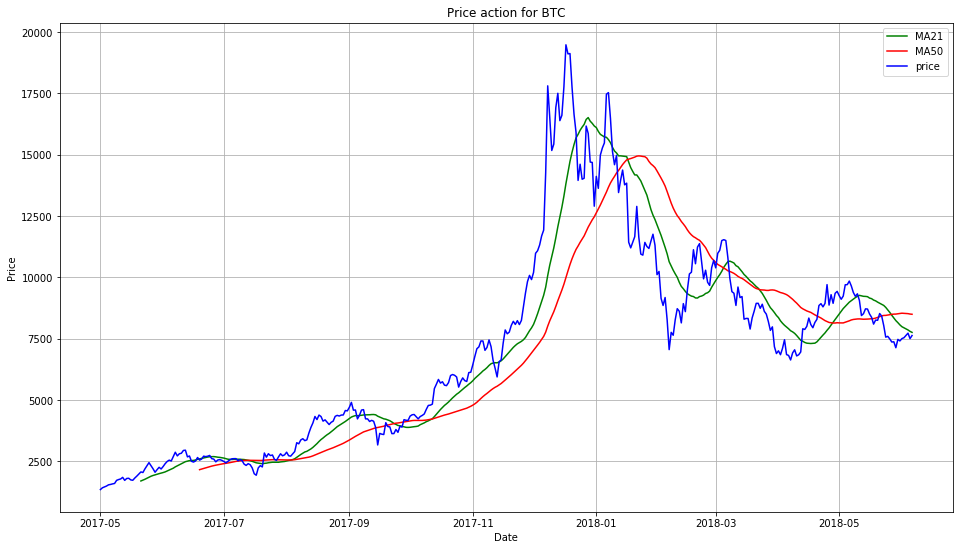

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

It can be seen that the moving average with a larger window reacts more slowly to price changes. It is on this idea that the trading strategy is based.


**Implement a function** that draws two graphs. The right side will display the price and moving averages. On the left - how many times the size of investments will change when using our strategy and with ordinary investment (we bought and hold, we look at how the price of our purchased currencies grows).

>**Notes:**
>- Let's use only closing prices. In this case, to find out the prices for yesterday, you should use the `shift (1)` method for `Series`.
>- The ratio of closing prices for today and yesterday is **multiplier** for today. At the same time, let's build accumulation graphs for multipliers. Those. if we look at 3 days and on the first day multiplier = 1.5, on the second - 0.5 and on the third - 2, then the graph will look like this: (1.5, 1.5 *0.5, 1.5* 0.5 * 2).
>- When using our new strategy, we will either buy if the leading average becomes larger than the lagging one by some `threshold` (in this case, it is better to divide the difference by the price first), or leave everything as it is. At the same time, of course, when making decisions for today, you need to look only at statistics from the past.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Try different parameter values ​​for different coins and draw conclusions about the applicability of such a model:

**Your answer is here**

## 9. Disclaimer

All examples of the strategies analyzed here are toys and are not suitable for real trading on the stock exchange. Without serious preparation, you will be eaten there with giblets.